# Task 2: To Explore Supervised Machine Learning
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [2]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading data
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [4]:
# display data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# check null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# statistical description
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


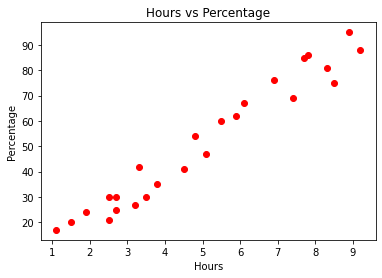

In [8]:
# visualize the plot of variable distribution
plt.scatter(data.Hours, data.Scores, color='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

In [9]:
# Preparing the data into independent and dependent variable

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [10]:
# Split data for training and testing purpose

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Test linear model algorithmns

In [16]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso
from sklearn.metrics import mean_absolute_error

In [17]:
# Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
mean_absolute_error(y_test, pred)

4.183859899002975

In [18]:
# RidgeCV 
reg = RidgeCV()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
mean_absolute_error(y_test, pred)

4.089342367220835

In [19]:
# Lasso
reg = Lasso()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
mean_absolute_error(y_test, pred)

3.9915771073417075

Thus, Lasso linear model algorithmn gives the least error score

## Lasso linear model

In [20]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

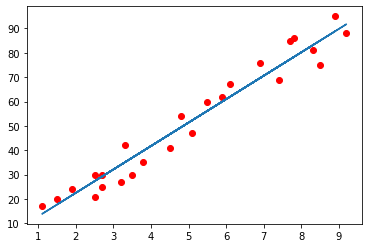

In [21]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X, line)
plt.show()

## make prediction

In [23]:
hours = 9.5
pred = lr.predict((np.array(hours).reshape(1,-1)))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.5
Predicted Score = 94.62059879863867
